# Project 2

## Reg_no: DS074

It's important that you fill in your registration number for proper documentation.

 **This is a dataset on weekly sales of different grocery stores. 
Use what you've learned to answer the following questions.**

[Link to data set](https://raw.githubusercontent.com/Tiamiyu1/Python-for-Data-Science-and-Analytics/main/Data/store_data.csv)



You can copy and paste the link directly into pd.read_csv('')

## Given store sales data, use Python to draw conclusions about how these stores are performing.

In [170]:
# imports libraries and load data
import numpy as np
import pandas as pd

df3 = pd.read_csv("https://raw.githubusercontent.com/Tiamiyu1/Python-for-Data-Science-and-Analytics/main/Data/store_data.csv")
sales_data = df3.copy()


In [ ]:
sales_data

,week,storeA,storeB,storeC,storeD,storeE
0,2014-05-04,2643,8257,3893,6231,1294
1,2014-05-11,6444,5736,5634,7092,2907
2,2014-05-18,9646,2552,4253,5447,4736
3,2014-05-25,5960,10740,8264,6063,949
4,2014-06-01,7412,7374,3208,3985,3023
...,...,...,...,...,...,...
195,2018-01-28,282,6351,7759,5558,1028
196,2018-02-04,4853,6503,4187,5956,1458
197,2018-02-11,9202,3677,4540,6186,243
198,2018-02-18,3512,7511,4151,5596,3501


### 1. Which store has the highest total sales for the final month of data?

In [171]:
sales_data['week'] = pd.to_datetime(sales_data['week'] ) 
sales_data['year'] = sales_data['week'].dt.year
sales_data['month'] = sales_data['week'].dt.month

lastmax_sales = sales_data.groupby(['year', 'month']).sum().sort_values(by = ['year', 'month'], ascending = False).head(1)
lastmax_sales

,,storeA,storeB,storeC,storeD,storeE
year,month,,,,,
2018,2,25127,24595,16447,22783,7787


Store A had the highest total sales for the final month of data.



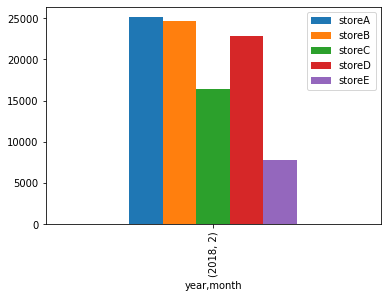

In [172]:
lastmax_sales.plot(kind = 'bar')

### 2. Which store makes the most sales on average?

In [175]:
most_sales = sales_data.sum().sort_values(ascending = False).drop(['year','month'])
most_sales
# Write your answer below as text

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


storeB    1351342
storeA    1173096
storeD    1086281
storeC     988421
storeE     516005
dtype: int64

In [176]:
top_sales = most_sales.head(1)
top_sales

storeB    1351342
dtype: int64

Store B made the most sales.

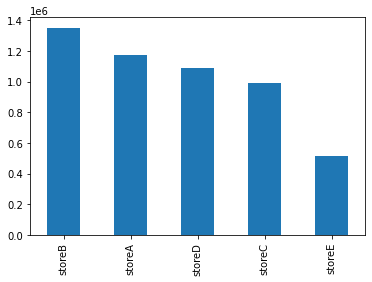

In [177]:
most_sales.plot(kind = 'bar')

### 3. Which store sells the most during the week of March 13th, 2016?

In [179]:
mar_13top = sales_data[sales_data['week'] =='2016-03-13']
mar_13top

,week,storeA,storeB,storeC,storeD,storeE,year,month
97,2016-03-13,2054,1390,5112,5513,2536,2016,3


In [187]:
top_mar13 = mar_13top.max().drop(['week','year','month'])
top_mar13

storeA    2054
storeB    1390
storeC    5112
storeD    5513
storeE    2536
dtype: object

Store D had the most sales during the week of Marth 13th, 2016

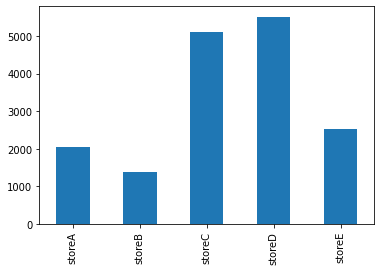

In [188]:
top_mar13.plot(kind = 'bar')


### 4. In what week does store C make its worst sales?

In [197]:
storec_top = sales_data[sales_data['storeC'] == sales_data['storeC'].min()]

storec_top


,week,storeA,storeB,storeC,storeD,storeE,year,month
9,2014-07-06,8567,3228,927,3277,168,2014,7


Store C had its worst sales in the week of July 6, 2014

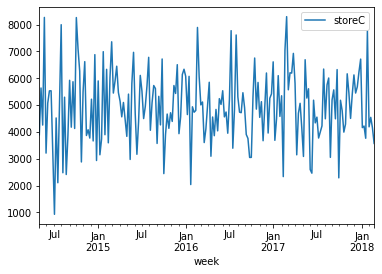

In [204]:
sales_data.plot(x = 'week', y = 'storeC')

### 5. Which store has the most sales in the latest 3-month period?

In [212]:
last3month_sales = sales_data.groupby(['year', 'month']).sum().sort_values(by = ['year', 'month'], ascending = False).head(3)
last3month_sales

storeA  storeB  storeC  storeD  storeE
year month                                        
2018 2       25127   24595   16447   22783    7787
     1       21776   25648   19893   23985   11038
2017 12      40688   29151   30198   28422    8509

In [213]:
top3month_sales = last3month_sales.sum()
top3month_sales

storeA    87591
storeB    79394
storeC    66538
storeD    75190
storeE    27334
dtype: int64

Store A had the most sales in the latest 3-month period.

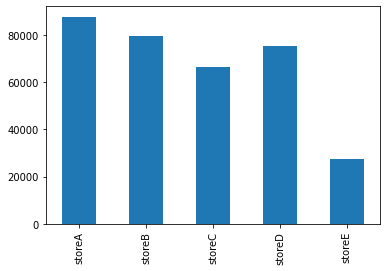

In [215]:
top3month_sales.plot(kind = 'bar')